# Preprocessing avec Scikit Learn

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer, QuantileTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame, read_csv
from pprint import pprint
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Les methodes de preprocessing

Toutes les méthodes de preprocessing suivent le même processus:   
1- On crée une instance de la méthode.   
2- On fit cette instance sur un dataset avec .fit()  
3- On applique la même transformation sur n'importe quel dataset avec .transform()  

## SimpleImputer

SimpleImputer sert à compléter les valeurs manquantes.
Les paramètres principaux de cette méthode sont:
- missing_value: Valeur à remplacer



- strategy:
    - "mean" (default): remplace toutes les missing_values par la moyenne de la colonne. Seulement sur les features numériques.
    - "median": remplace toutes les missing_values par la médiane de la colonne. Seulement sur les features numériques.
    - "most_frequent": remplace toutes les missing_values par la valeur la plus présente dans la colonne. Seulement sur les features numériques.
    - "constant": remplace toutes les missing_values par la valeur du paramètre fill_value

- fill_value: valeur qui remplace les missing_values si strategy = "constant"

## OneHotEncoder

OneHotEncoder est utilisé pour encoder les variables catégorielles en variables numériques binaires.  

In [ ]:
X =[['Cat'], ['Dog'], ['Python']]
X1 = [['Dog'], ['Python'], ['Cat'], ['Cat'], ['Python']]

### Encodeur Simple

#### "categories": 
    - "auto" détermine automatiquement les différentes catégories en se basant sur celes présentes dans le dataset passé en fit. 
    - On peut également lui passer une liste de catégories.


In [ ]:
encoder = OneHotEncoder()
encoder.fit(X)
encoder.transform(X1).toarray()

### Supprimer une colonne pour éviter la colinéarité

#### "drop": drop un des features
    - "first": drop le premier feature
    -  On peut aussi lui préciser quel feature dropper.


In [ ]:
encoder_drop = OneHotEncoder(drop="first")
encoder_drop.fit(X)
encoder_drop.transform(X1).toarray()

### Gérer des valeurs inconnues

#### "handle_unknown": 
    - "ignore": ne peut être utilisé si drop est précisé. Si l'encoder rencontre une valeur inconnue dans le dataset à transformer ,il remplira toutes les colonnes créées avec des zéros.
    - "error": l'encodeur lèvera une erreur lorsqu'il rencontrera une nouvelle valeur.

In [ ]:
X1.append(['Anaconda'])
encoder_handle_unknown = OneHotEncoder(handle_unknown="ignore")
encoder_handle_unknown.fit(X)
encoder_handle_unknown.transform(X1).toarray()

## StandardScaler

Les différents modules Sklearn de preprocessing sont disponibles à :
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Le StandardScaler transforme les données pour les présenter sous une distribution qui se rapproche d'une Gaussienne avec une moyenne de zéro et une variance de un.

C'est important de l'utiliser pour des modèles type SVM, RBF Kernel (qui utilise la distance euclidienne), mais aussi les régularisation L1 et L2 des modèles linéaires.

Les valeurs manquantes ne sont pas regardées pendant l'entraînement, et sont restituées comme tel lors de la transformation.

Il existe deux paramètres importants qui sont True par défaut :
**with_mean** : centre les données avant de les scaler.
**with_std** : scale les données avec l'écart type.

In [28]:
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]

data0 = data
scaler = StandardScaler()
scaler.fit(data)
print(scaler.mean_)
scaler.transform(data0)

[-0.125  9.   ]


array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

### MinMaxScaler

Permet de transposer les valeur d'un dataframe sur un range choisie.

In [29]:
data1 = data
scaler = MinMaxScaler() #feature_range = [2,4])
scaler.fit_transform(data1)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

### Normalizer

Permet d'appliquer de la normalisation sur un dataframe.<br />
Fonctionne avec Dense et spicy.matrix.<br />
‘l1’, ‘l2’, ‘max’

In [30]:
data2 = data
normalizer = Normalizer(norm = 'l1')
normalizer.fit_transform(data2)

array([[-0.33333333,  0.66666667],
       [-0.07692308,  0.92307692],
       [ 0.        ,  1.        ],
       [ 0.05263158,  0.94736842]])

### Quantile Transformer

Permet de générer des quantiles à partir d'un dataframe.

In [31]:
data3 = data
quantiletransformer = QuantileTransformer(n_quantiles=3, random_state=0)
quantiletransformer.fit_transform(data3)

array([[0.        , 0.        ],
       [0.33333333, 0.33333333],
       [0.6       , 0.6       ],
       [1.        , 1.        ]])

### Function Transformer

Permet d'appliquer n'importe quelle fonction sur un dataframe

In [32]:
data4 = data
functiontransformer = FunctionTransformer(np.log1p)
functiontransformer.fit_transform(data4)

/home/guillaume/.virtualenvs/MachineLearning/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:165: RuntimeWarning: divide by zero encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


array([[       -inf,  1.09861229],
       [-0.69314718,  1.94591015],
       [ 0.        ,  2.39789527],
       [ 0.69314718,  2.94443898]])

# Pipelines

## Pipeline pour les features catégorielles

Pipeline prend en parametres une liste de tuples (nom, transform) qui définie une séquence de transformations.

In [33]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

- Les pipelines forment une arborescence de méthodes et de paramêtres.
- Les pipelines exposent l'ensemble des paramètres.

In [34]:
categorical_pipe

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True))],
         verbose=False)

- Les paramètres sont préfixés par le nom donné dans le tuple.
- On peut utiliser get_param pour obtenir les paramètres.
- On peut utiliser set_param pour les modifier.
- Attention, il y'a 2 underscore!
- Chaque hyperparamètre pourra être optimisé.

In [35]:
pprint(categorical_pipe.get_params())

{'imputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__missing_values': nan,
 'imputer__strategy': 'most_frequent',
 'imputer__verbose': 0,
 'memory': None,
 'onehot': OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True),
 'onehot__categories': 'auto',
 'onehot__drop': None,
 'onehot__dtype': <class 'numpy.float64'>,
 'onehot__handle_unknown': 'error',
 'onehot__sparse': True,
 'steps': [('imputer',
            SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)),
           ('onehot',
            OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True))],
 'verbose': False}


#### Setters et getters

In [36]:
categorical_pipe.get_params()['imputer__strategy']

'most_frequent'

In [37]:
categorical_pipe.set_params(imputer__strategy='constant', imputer__fill_value='NA')

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value='NA',
                               missing_values=nan, strategy='constant',
                               verbose=0)),
                ('onehot',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True))],
         verbose=False)

In [38]:
categorical_pipe.set_params(imputer__strategy='most_frequent');

## Pipeline pour les features numériques

In [39]:
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## ColumnTransformer

ColumnTransformer permet de combiner des traitements differents pour chaque groupe de colonnes.

In [40]:
cat_columns=['Fence', 'CentralAir']
num_columns=['GrLivArea', 'LotFrontage', 'LotArea']

preprocess_pipe = ColumnTransformer([
    ('cat', categorical_pipe, cat_columns),
    ('num', numeric_pipe, num_columns)])


## Pipeline complet

Pipeline complet avec preprocessing et modèle

In [41]:
model = LinearRegression()

full_pipe = Pipeline(
    [('pp', preprocess_pipe),
    ('reg', model)]
)

### Exemple sur House Prices

In [42]:
train_df = read_csv('./train.csv')
test_df = read_csv('./test.csv')
X = train_df[['GrLivArea', 'LotFrontage', 'LotArea', 'Fence', 'CentralAir']]
y = train_df[['SalePrice']]
X.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'Fence', 'CentralAir'], dtype='object')

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

En une seule ligne:
- Preprocessing des features numériques et catégorielles
- Entrainement du modèle

In [44]:
full_pipe.fit(X_train, y_train);

- Preprocessing
- Prediction sur le validation set et le test set

In [45]:
y_train_pred = full_pipe.predict(X_train)
y_valid_pred = full_pipe.predict(X_valid)

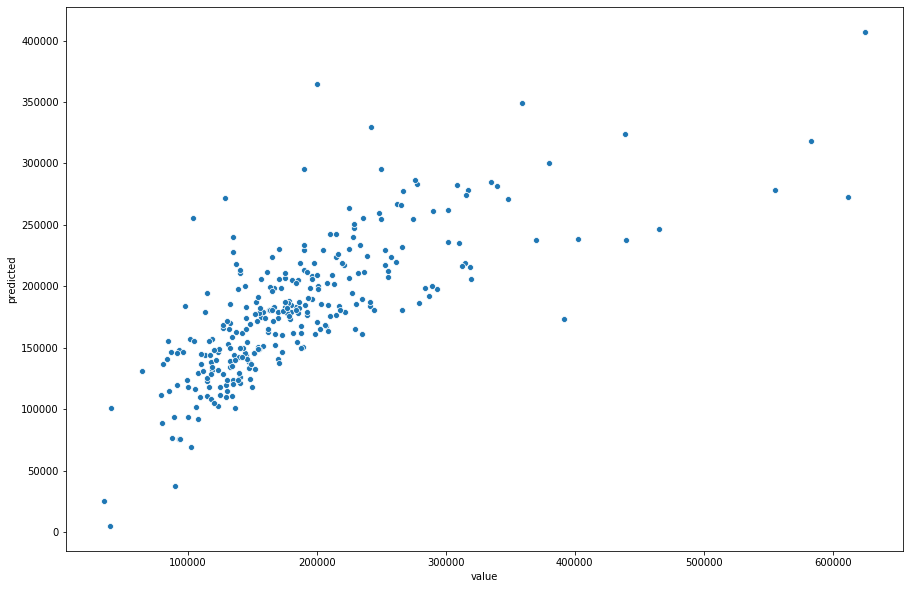

In [46]:
df = DataFrame(data={'value':y_valid['SalePrice'], 'predicted':y_valid_pred.reshape(-1,)}, index=y_valid.index)
plt.figure(figsize=(15,10))
sns.scatterplot(x='value',y='predicted', data=df )
plt.show()

# Sources

- https://www.kaggle.com/lucabasa/understand-and-use-a-pipeline
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

# Aller plus loin
- Définir des transformations pour des dataframes pandas
    - https://ramhiser.com/post/2018-04-16-building-scikit-learn-pipeline-with-pandas-dataframe/